In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import math as maths
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import FancyArrow
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from numpy.linalg import eig
from matplotlib import ticker, cm
from scipy import interpolate
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
from pathlib import Path  
style.use('default') or plt.style.use('default')
import seaborn as sns


In [2]:
# Sims to plot

data = {}
Sims = ['n3E0.5dsdt50', 'n4E1.8dsdt50']
for i in range(len(Sims)):
    data[Sims[i]] = pd.read_csv('../Simulations/DerwaelSimulations/AgeAt0m/' + Sims[i] + '/Age.csv', sep=",")


In [3]:
# Create a regular grid and interpolate the data onto it

Age = {}

xmin, xmax = min(data[Sims[0]]['Points:0']), max(data[Sims[0]]['Points:0'])
ymin, ymax = min(data[Sims[0]]['Points:1']), max(data[Sims[0]]['Points:1'])
dist = 100
nx, ny = int((xmax - xmin)/dist + 1), int((ymax - ymin)/dist + 1)
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
grid_x, grid_y = np.meshgrid(x, y)


In [4]:
# Interpolate the data onto a regular grid

for i in Sims:
    Age[i] = scipy.interpolate.griddata((data[i]["Points:0"], data[i]["Points:1"]), data[i]["age"], (grid_x, grid_y), method='linear')


In [5]:
Age

{'n3E0.5dsdt50': array([[14.001     , 14.24357072, 14.48614144, ..., 10.61816527,
         10.48008263, 10.342     ],
        [14.00095652, 14.7135358 , 14.95610651, ..., 10.63469468,
         10.49661205, 10.35852941],
        [14.00091304, 14.72403463, 15.42607159, ..., 10.65122409,
         10.51314146, 10.37505882],
        ...,
        [ 5.68628889,  6.59757447,  7.45170893, ...,  7.16404976,
          6.73041377,  6.29677778],
        [ 5.57714444,  6.45985446,  7.1366949 , ...,  7.03663719,
          6.61962488,  6.18598889],
        [ 5.468     ,  6.14484043,  6.82168087, ...,  6.90622444,
          6.49071222,  6.0752    ]]),
 'n4E1.8dsdt50': array([[14.001     , 14.24357072, 14.48614144, ..., 10.61816527,
         10.48008263, 10.342     ],
        [14.00095652, 14.69510723, 14.93767794, ..., 10.63469468,
         10.49661205, 10.35852941],
        [14.00091304, 14.70519271, 15.38921445, ..., 10.65122409,
         10.51314146, 10.37505882],
        ...,
        [ 5.68628889, 

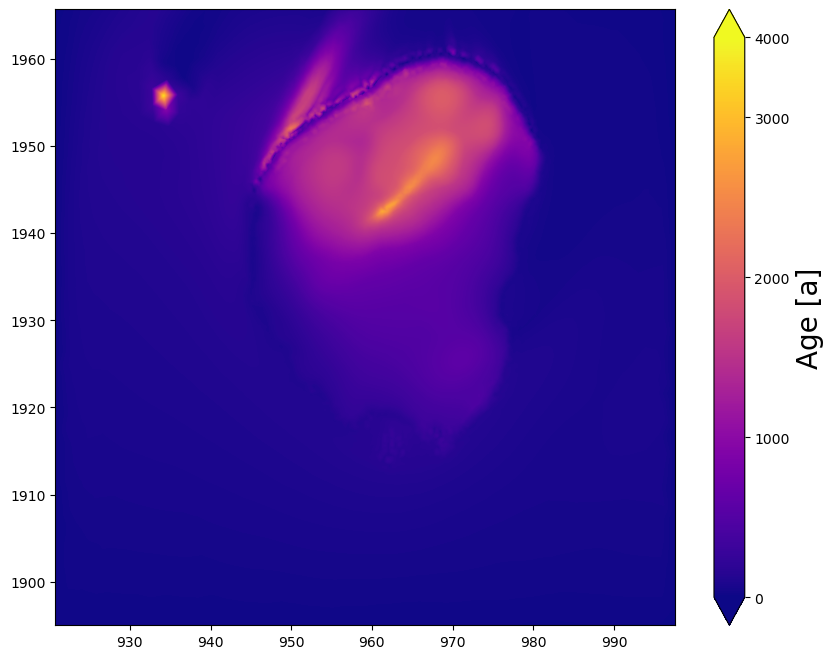

In [27]:
# Plot the age field for n=3

i = 0

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(grid_x/1000, grid_y/1000, Age[Sims[i]], levels=np.linspace(0.0,3500.0,500), cmap="plasma", extend = 'both')
cbar = fig.colorbar(CS, ticks=[0, 1000, 2000, 3000, 4000])
cbar.set_label('Age [a]', size=20)
fig.savefig('../Figures/DerwaelAge0m.jpg', format='jpg', dpi=700, bbox_inches = "tight")


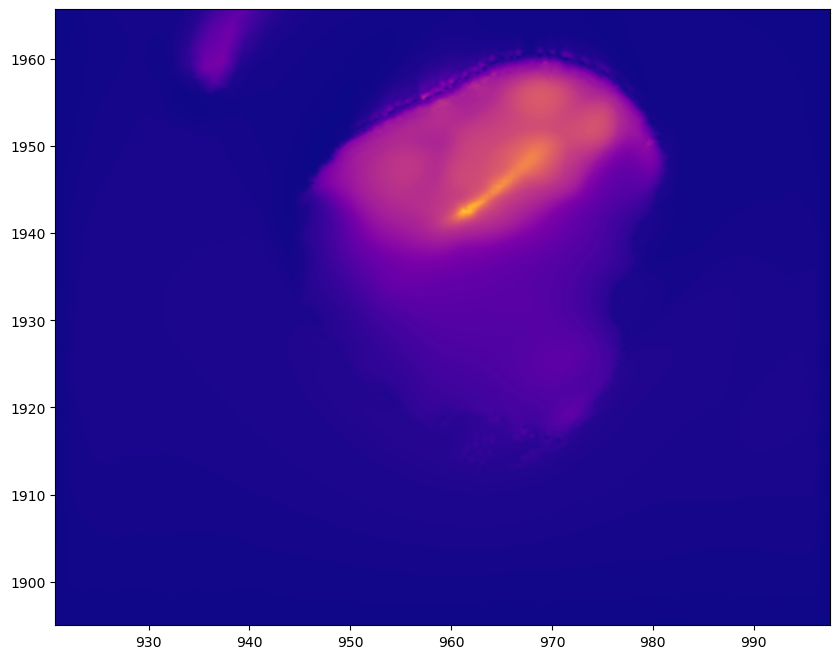

In [7]:
# Plot the age field for n=4

i = 1

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(grid_x/1000, grid_y/1000, Age[Sims[i]], levels=np.linspace(0.0,3500.0,500), cmap="plasma", extend = 'both')


In [8]:
AgeDiff = Age[Sims[1]] - Age[Sims[0]]
AgeDiff

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.01842857, -0.01842857, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.01884193, -0.03685714, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.40419415, -0.74776308, ...,  0.16562468,
         0.08281234,  0.        ],
       [ 0.        , -0.37388154, -0.52937915, ...,  0.15030097,
         0.08281234,  0.        ],
       [ 0.        , -0.15549761, -0.31099523, ...,  0.13221168,
         0.06610584,  0.        ]])

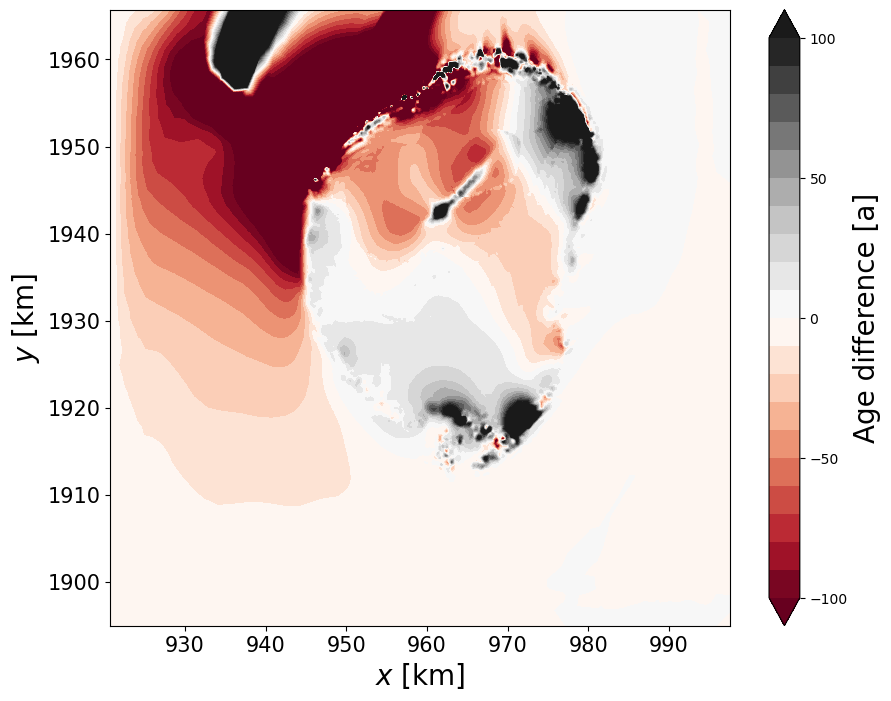

In [22]:
# Plot difference between age fields at an elevation of 0m

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(grid_x/1000, grid_y/1000, AgeDiff, levels=np.linspace(-100.0,100,21), cmap="RdGy", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=20)
ax.set_ylabel(r'$y$ [km]', size=20)
ax.tick_params(axis='both', labelsize=15)
cbar = fig.colorbar(CS, ticks=[-100, -50, 0, 50, 100])
cbar.set_label('Age difference [a]', size=20)
fig.savefig('../Figures/DerwaelAgeDifference.jpg', format='jpg', dpi=700, bbox_inches = "tight")
